In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [131]:
df = pd.read_csv("loan.csv", low_memory=False)
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


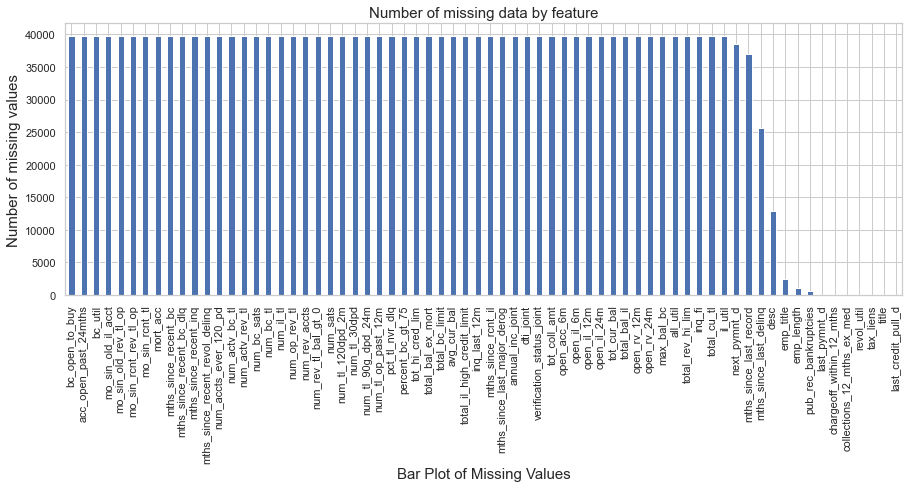

In [132]:
# Plot Missing Values to Understand if columns need to be removed or impute
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [133]:
# Remove columns that do not add value
df = df.loc[:,df.columns.isin(['loan_amnt','term','int_rate','grade','sub_grade','annual_inc', 'purpose', 'dti', 'emp_length','issue_d','home_ownership','verification_status','application_type','last_credit_pull_d','last_pymnt_amnt','collection_recovery_fee','recoveries','total_rec_int','total_rec_prncp','total_pymnt','total_pymnt_inv','out_prncp_inv','out_prncp','total_acc','revol_util','revol_bal','pub_rec','open_acc','inq_last_6mths','earliest_cr_line','delinq_2yrs','loan_status'])]
print("Number of columns: " + str(len(df.columns)))

Number of columns: 32


In [134]:
# Find out the percentage of missing values in each column in the data set
# Filter the dataframe for columns that has more than 85% missing values
# We can safely remove these variables
percent_missing = df.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'column': df.columns, 'percent_missing': percent_missing})
missing_df = missing_df[missing_df['percent_missing'] > 90]
columns_list = missing_df['column'].tolist()
df.drop(columns_list, axis=1, inplace=True)
columns_list_str = ','.join([str(item) for item in columns_list])
print("Dropping " + str(len(columns_list)) + " columns with more than 90% missing values: \n" + columns_list_str)

Dropping 0 columns with more than 90% missing values: 



In [135]:
# Drop rows where only 80% or more valid data is available
pre_drop_rows_count = df.count()
df = df.dropna(how='any', axis=0, thresh=df.shape[1]*0.8)
print("Total number of rows :" + str(len(df)))

Total number of rows :39717


In [136]:
# Find columns with less missing percentage and perform imputations
percent_missing = df.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'column': df.columns, 'percent_missing': percent_missing})
missing_df = missing_df[missing_df['percent_missing'] > .025 ]
columns_list = missing_df['column'].tolist()
columns_list_str = ','.join([str(item) for item in columns_list])
print("Impute " + str(len(columns_list)) + " columns with more than 1% missing values: \n" + columns_list_str)

Impute 2 columns with more than 1% missing values: 
emp_length,revol_util


In [137]:
# term is a combination of integer and object, need to clean up.
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

In [138]:
# validate cleaned up columns
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
emp_length,1075,2.706650
revol_util,50,0.125891
last_credit_pull_d,2,0.005036
loan_amnt,0,0.000000
pub_rec,0,0.000000
last_pymnt_amnt,0,0.000000
collection_recovery_fee,0,0.000000
recoveries,0,0.000000
total_rec_int,0,0.000000
total_rec_prncp,0,0.000000


In [139]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [140]:
# Map Good loan versus bad loan using a target variable
df['loan_default_status'] = np.where((df.loan_status == 'Charged Off'), 0, 1)
df.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,loan_default_status
0,5000,36,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,171.62,May-16,INDIVIDUAL,1
1,2500,60,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,1008.710000,1008.71,456.46,435.17,117.08,1.11,119.66,Sep-13,INDIVIDUAL,0
2,2400,36,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,649.91,May-16,INDIVIDUAL,1
3,10000,36,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,12231.890000,12231.89,10000.00,2214.92,0.00,0.00,357.48,Apr-16,INDIVIDUAL,1
4,3000,60,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,67.79,May-16,INDIVIDUAL,1
5,5000,36,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,...,5632.210000,5632.21,5000.00,632.21,0.00,0.00,161.03,Jan-16,INDIVIDUAL,1
6,7000,60,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,...,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,1313.76,May-16,INDIVIDUAL,1
7,3000,36,18.64%,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,...,3939.135294,3939.14,3000.00,939.14,0.00,0.00,111.34,Dec-14,INDIVIDUAL,1
8,5600,60,21.28%,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,...,646.020000,646.02,162.02,294.94,189.06,2.09,152.39,Aug-12,INDIVIDUAL,0
9,5375,60,12.69%,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,...,1476.190000,1469.34,673.48,533.42,269.29,2.52,121.45,Mar-13,INDIVIDUAL,0


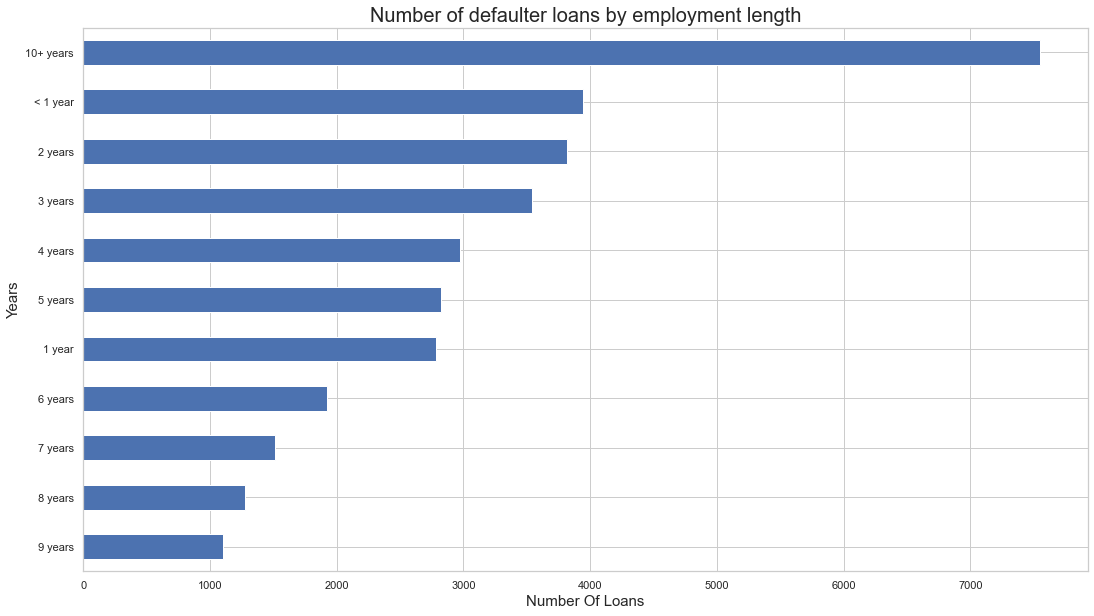

In [145]:
# No of Defaulted Loans based on employment length
fig = plt.figure(figsize=(18,10))
df[df['loan_default_status']==1].groupby('emp_length')['loan_default_status'].count().sort_values().plot(kind='barh')
plt.ylabel('Years',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number of defaulter loans by employment length',fontsize=20);

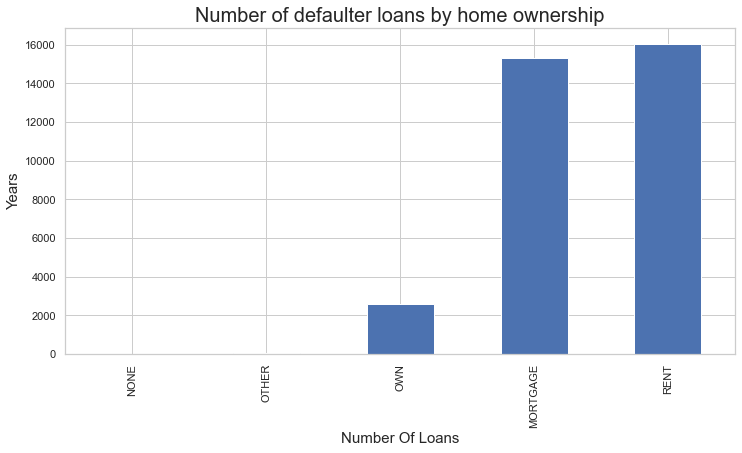

In [153]:
# No of Defaulted Loans based on Home Ownership
fig = plt.figure(figsize=(12,6))
df[df['loan_default_status']==1].groupby('home_ownership')['loan_default_status'].count().sort_values().plot(kind='bar')
plt.ylabel('Years',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number of defaulter loans by home ownership',fontsize=20);

Text(0, 0.5, 'Loan Amount')

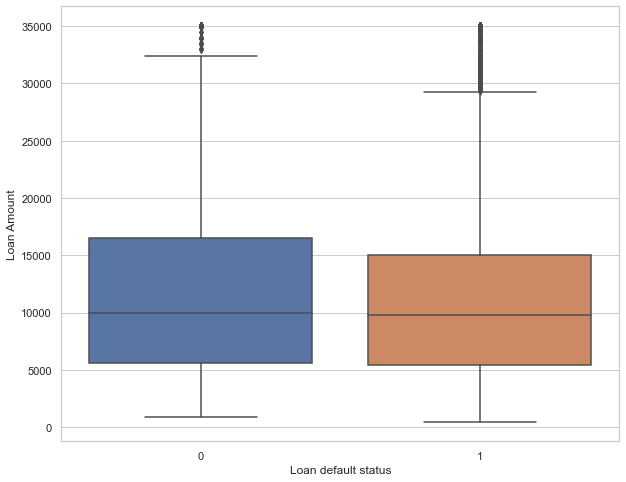

In [154]:
# Boxplot of Verification Status and Loan Amount
plt.figure(figsize=(10,8))
sns.boxplot(x=df.loan_default_status, y=df.loan_amnt)
plt.xlabel("Loan default status")
plt.ylabel("Loan Amount")

In [155]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[purp_loan[0]], df[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484
